<a href="https://colab.research.google.com/github/kunal114/Machine-Learning-/blob/master/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#implicit equation of features therefore we have to apply feature scaling 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv')
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [ ]:
x= df.iloc[:,1:-1].values
y= df.iloc[:,-1].values

In [ ]:
print(x)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y=y.reshape(-1,1) #as feature scaling is done on train_test_split data as standardscaer works on 2d array we have to reshape y
# y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
x=scX.fit_transform(x)
print(x)
scY = StandardScaler()
y=scY.fit_transform(y)
print(y)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
 #training of model
 from sklearn.svm import SVR
 svr= SVR(kernel="rbf") #rbf==Gaussian radial basis function
 url_used= 'https://data-flair.training/blogs/svm-kernel-functions/'
 svr.fit(x,np.ravel(y))

SVR()

In [ ]:
#predicting
svr.predict([[6.5]]) #scaled answer
svr.predict(scX.transform([[6.5]])) #unscaled answer according to x
scY.inverse_transform([svr.predict(scX.transform([[6.5]]))]) #unscaled answer of y

array([[170370.0204065]])

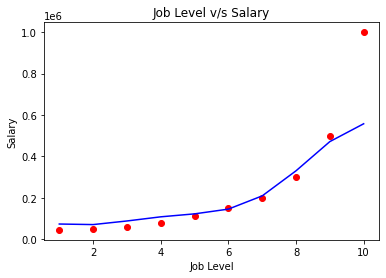

In [ ]:
#Visualizing the model
plt.scatter(scX.inverse_transform(x),scY.inverse_transform(y),color='red')

ll=len(svr.predict(x))
plt.plot(scX.inverse_transform(x),scY.inverse_transform(svr.predict(x).reshape(ll,1)),color='blue')
plt.title('Job Level v/s Salary')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.show()

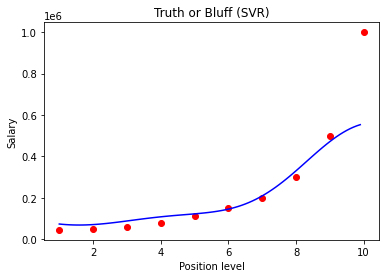

In [ ]:
# visualizing for higher resolution and smoother curve

X_grid = np.arange(min(scX.inverse_transform(x)), max(scX.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
k=svr.predict(scX.transform(X_grid))
plt.scatter(scX.inverse_transform(x), scY.inverse_transform(y), color = 'red')
plt.plot(X_grid, scY.inverse_transform(k.reshape(len(k),1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()